In [1]:
from confirm.outlaw.nb_util import setup_nb

setup_nb(autoreload=False)

import matplotlib.pyplot as plt
import scipy.stats
import jax
import jax.numpy as jnp
import numpy as np

import confirm.imprint as ip
import confirm.models.fisher_exact as fisher

## Binomial two class

In [6]:
K = 2**12
lam = 0.05
for n in range(3, 15):
    g = ip.cartesian_grid(
        [-3, -3], [3, 3], n=[20, 20], null_hypos=[ip.hypo("theta1 < theta0")]
    )
    rej_df = ip.validate(fisher.FisherExact, g, lam, K=K, model_kwargs=dict(n=n))
    print(f"n_arm_samples={n} max(tie)={rej_df['tie_est'].max():.4f}")

n_arm_samples=3 max(tie)=0.0000


KeyboardInterrupt: 

In [ ]:
K = 2**12
lam = 0.05

for n in range(3, 15):
    g = ip.cartesian_grid(
        [-1, -1], [1, 1], n=[1, 1], null_hypos=[ip.hypo("theta1 < theta0")]
    )
    rej_df = ip.validate(fisher.FisherExact, g, lam, K=K, model_kwargs=dict(n=n))
    print(rej_df["tie_est"].max())
    rej_df = ip.validate(fisher.BoschlooExact, g, lam, K=K, model_kwargs=dict(n=n))
    print(rej_df["tie_est"].max())

0.0
0.015869140625
0.00341796875
0.03369140625
0.009033203125
0.0263671875
0.0205078125
0.031005859375
0.010498046875
0.037353515625
0.0107421875
0.03857421875
0.016845703125
0.04931640625
0.021240234375
0.04345703125
0.033447265625
0.047119140625
0.036376953125
0.044921875
0.018798828125
0.034423828125
0.019287109375
0.047119140625


In [ ]:
text = """
0.0
0.015869140625
0.00341796875
0.03369140625
0.009033203125
0.0263671875
0.0205078125
0.031005859375
0.010498046875
0.037353515625
0.0107421875
0.03857421875
0.016845703125
0.04931640625
0.021240234375
0.04345703125
0.033447265625
0.047119140625
0.036376953125
0.044921875
0.018798828125
0.034423828125
0.019287109375
0.047119140625
"""
data = np.concatenate(
    (
        np.arange(3, 15)[:, None],
        np.array([float(f) for f in text.split("\n")[1:-1]]).reshape((-1, 2)),
    ),
    axis=1,
)
for i in range(data.shape[0]):
    print(
        f"n={int(data[i,0])} max(fisher)={data[i, 1]:.4f} max(boschloo)={data[i, 2]:.4f}"
    )

n=3 max(fisher)=0.0000 max(boschloo)=0.0159
n=4 max(fisher)=0.0034 max(boschloo)=0.0337
n=5 max(fisher)=0.0090 max(boschloo)=0.0264
n=6 max(fisher)=0.0205 max(boschloo)=0.0310
n=7 max(fisher)=0.0105 max(boschloo)=0.0374
n=8 max(fisher)=0.0107 max(boschloo)=0.0386
n=9 max(fisher)=0.0168 max(boschloo)=0.0493
n=10 max(fisher)=0.0212 max(boschloo)=0.0435
n=11 max(fisher)=0.0334 max(boschloo)=0.0471
n=12 max(fisher)=0.0364 max(boschloo)=0.0449
n=13 max(fisher)=0.0188 max(boschloo)=0.0344
n=14 max(fisher)=0.0193 max(boschloo)=0.0471


In [ ]:
model = FisherExact(0, 10, n=10)
np.random.seed(0)
theta = np.random.rand(5, 2)
null_truth = np.ones((5, 1), dtype=bool)
np.testing.assert_allclose(
    model._sim_scipy(model.samples[0:10], theta, null_truth),
    model._sim_jax(model.samples[0:10], theta, null_truth),
)

In [ ]:
g = ip.cartesian_grid(
    [-1, -1], [1, 1], n=[50, 50], null_hypos=[ip.hypo("theta1 < theta0")]
)
# ip.grid.plot_grid(g)
# plt.show()

In [ ]:
n = 10
K = 2**12
rej_df = ip.validate(FisherExact, g, 0.0286, K=K, model_kwargs=dict(n_arm_samples=n))

KeyError: 'theta1'

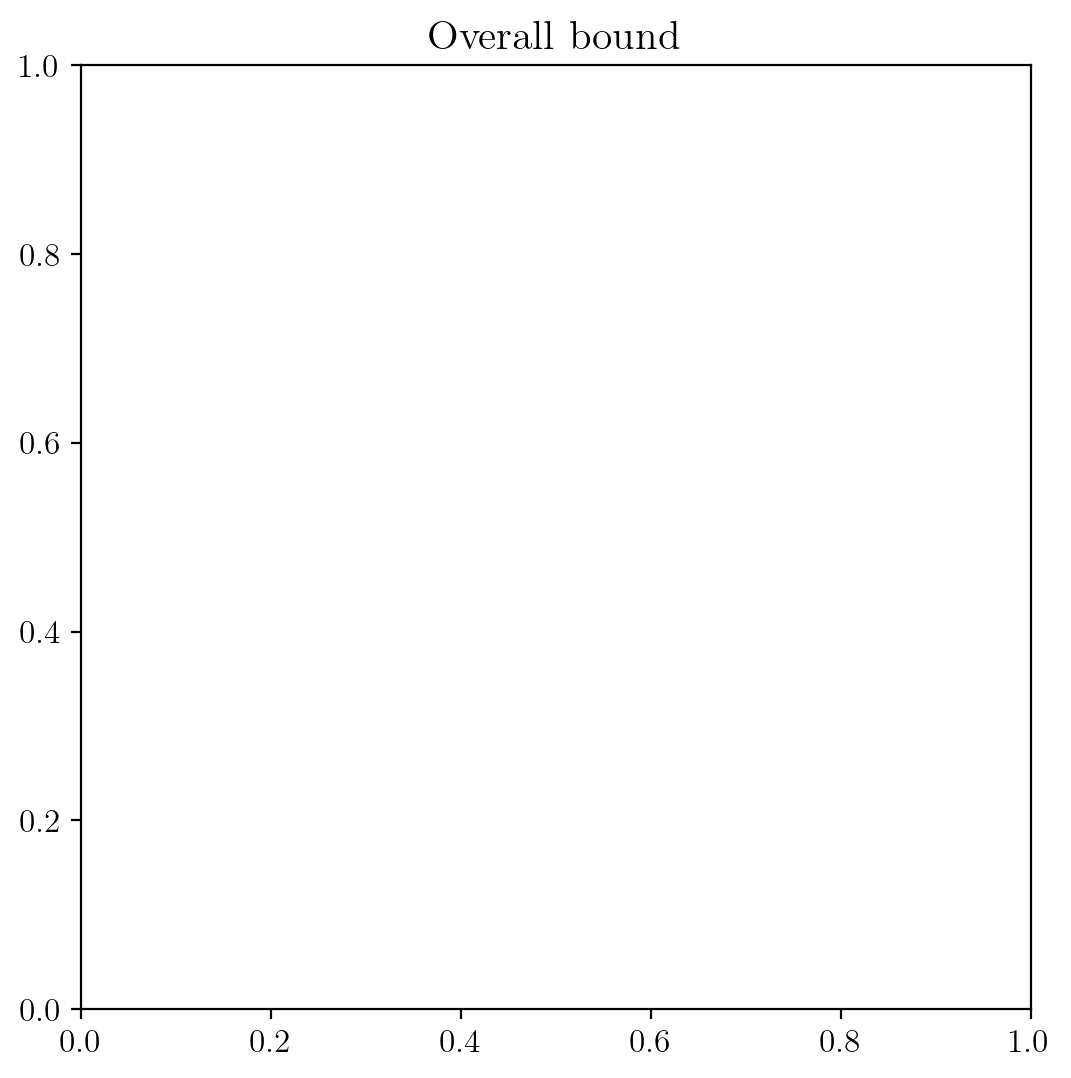

In [ ]:
import confirm.imprint.summary

ip.summary.summarize_validate(g, rej_df)

## Tuning Fisher Exact

In [2]:
n = 15
alpha = 0.05
g = ip.cartesian_grid(
    [-1, -1], [1, 1], n=[4, 4], null_hypos=[ip.hypo("theta1 < theta0")]
)
iter, reports, ada = ip.ada_tune(
    fisher.FisherExact,
    g=g,
    alpha=alpha,
    model_kwargs=dict(n=n),
    grid_target=0.0001,
    bias_target=0.0001,
    std_target=0.0001,
    iter_size=2**11,
    n_K_double=6,
    n_iter=1000,
)

{
    'i': 1,
    'bias_tie': '0.000315',
    'std_tie': '0.001586',
    'spread_tie': '0.004150',
    'grid_cost': '0.042379',
    'lamss': '0.013419',
    'min(B_lamss)': '0.012664',
    'max(B_lamss)': '0.025087',
    'tie_{k}(lamss)': '0.006958',
    'tie + slack': '0.049652',
    'n_impossible': 0,
    'runtime_convergence_check': '2.145417',
    'runtime_refine_deepen': '3.296932',
    'runtime_processing': '2.894109',
    'n_refine': 7,
    'n_deepen': 3,
    'n_complete': 0
}

{
    'i': 2,
    'bias_tie': '-0.001240',
    'std_tie': '0.002898',
    'spread_tie': '0.011597',
    'grid_cost': '0.029307',
    'lamss': '0.032798',
    'min(B_lamss)': '0.030216',
    'max(B_lamss)': '0.054323',
    'tie_{k}(lamss)': '0.015747',
    'tie + slack': '0.043814',
    'n_impossible': 0,
    'runtime_convergence_check': '0.042527',
    'runtime_refine_deepen': '0.052824',
    'runtime_processing': '3.551950',
    'n_refine': 15,
    'n_deepen': 12,
    'n_complete': 0
}

{
    'i': 3,
    'bias_tie': '-0.002773',
    'std_tie': '0.003846',
    'spread_tie': '0.008301',
    'grid_cost': '0.017489',
    'lamss': '0.064068',
    'min(B_lamss)': '0.064068',
    'max(B_lamss)': '0.069710',
    'tie_{k}(lamss)': '0.024780',
    'tie + slack': '0.039495',
    'n_impossible': 0,
    'runtime_convergence_check': '0.043031',
    'runtime_refine_deepen': '0.047569',
    'runtime_processing': '3.936933',
    'n_refine': 31,
    'n_deepen': 33,
    'n_complete': 0
}

{
    'i': 4,
    'bias_tie': '-0.001157',
    'std_tie': '0.003107',
    'spread_tie': '0.009644',
    'grid_cost': '0.009524',
    'lamss': '0.069710',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.071555',
    'tie_{k}(lamss)': '0.033325',
    'tie + slack': '0.041692',
    'n_impossible': 0,
    'runtime_convergence_check': '0.042479',
    'runtime_refine_deepen': '0.046959',
    'runtime_processing': '4.496110',
    'n_refine': 58,
    'n_deepen': 83,
    'n_complete': 0
}

{
    'i': 5,
    'bias_tie': '0.002554',
    'std_tie': '0.005172',
    'spread_tie': '0.018555',
    'grid_cost': '0.004957',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.038208',
    'tie + slack': '0.045719',
    'n_impossible': 0,
    'runtime_convergence_check': '0.043741',
    'runtime_refine_deepen': '0.047018',
    'runtime_processing': '5.618234',
    'n_refine': 46,
    'n_deepen': 237,
    'n_complete': 0
}

{
    'i': 6,
    'bias_tie': '0.000801',
    'std_tie': '0.002691',
    'spread_tie': '0.010010',
    'grid_cost': '0.002545',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.071555',
    'tie_{k}(lamss)': '0.040405',
    'tie + slack': '0.043751',
    'n_impossible': 0,
    'runtime_convergence_check': '0.049882',
    'runtime_refine_deepen': '0.051248',
    'runtime_processing': '9.320545',
    'n_refine': 178,
    'n_deepen': 203,
    'n_complete': 0
}

{
    'i': 7,
    'bias_tie': '-0.000195',
    'std_tie': '0.003338',
    'spread_tie': '0.020508',
    'grid_cost': '0.001280',
    'lamss': '0.071555',
    'min(B_lamss)': '0.069710',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.041016',
    'tie + slack': '0.042100',
    'n_impossible': 0,
    'runtime_convergence_check': '0.048495',
    'runtime_refine_deepen': '0.052552',
    'runtime_processing': '7.948500',
    'n_refine': 259,
    'n_deepen': 554,
    'n_complete': 0
}

{
    'i': 8,
    'bias_tie': '-0.001396',
    'std_tie': '0.003174',
    'spread_tie': '0.008911',
    'grid_cost': '0.000643',
    'lamss': '0.071555',
    'min(B_lamss)': '0.071555',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.041138',
    'tie + slack': '0.040385',
    'n_impossible': 0,
    'runtime_convergence_check': '0.059411',
    'runtime_refine_deepen': '0.056345',
    'runtime_processing': '12.916256',
    'n_refine': 600,
    'n_deepen': 857,
    'n_complete': 0
}

{
    'i': 9,
    'bias_tie': '-0.001387',
    'std_tie': '0.003152',
    'spread_tie': '0.008789',
    'grid_cost': '0.000323',
    'lamss': '0.071555',
    'min(B_lamss)': '0.071555',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.041260',
    'tie + slack': '0.040196',
    'n_impossible': 0,
    'runtime_convergence_check': '0.065092',
    'runtime_refine_deepen': '0.061192',
    'runtime_processing': '8.354015',
    'n_refine': 1536,
    'n_deepen': 512,
    'n_complete': 0
}

{
    'i': 10,
    'bias_tie': '-0.002085',
    'std_tie': '0.003685',
    'spread_tie': '0.008789',
    'grid_cost': '0.000162',
    'lamss': '0.071555',
    'min(B_lamss)': '0.071555',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.041260',
    'tie + slack': '0.039336',
    'n_impossible': 0,
    'runtime_convergence_check': '0.097742',
    'runtime_refine_deepen': '0.066604',
    'runtime_processing': '7.004076',
    'n_refine': 1785,
    'n_deepen': 263,
    'n_complete': 0
}

{
    'i': 11,
    'bias_tie': '-0.001724',
    'std_tie': '0.003046',
    'spread_tie': '0.007202',
    'grid_cost': '0.000161',
    'lamss': '0.071555',
    'min(B_lamss)': '0.071555',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.042725',
    'tie + slack': '0.041162',
    'n_impossible': 0,
    'runtime_convergence_check': '0.115802',
    'runtime_refine_deepen': '0.076228',
    'runtime_processing': '7.281504',
    'n_refine': 1862,
    'n_deepen': 186,
    'n_complete': 0
}

{
    'i': 12,
    'bias_tie': '-0.001753',
    'std_tie': '0.003098',
    'spread_tie': '0.007324',
    'grid_cost': '0.000161',
    'lamss': '0.071555',
    'min(B_lamss)': '0.071555',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.042725',
    'tie + slack': '0.041133',
    'n_impossible': 0,
    'runtime_convergence_check': '0.139108',
    'runtime_refine_deepen': '0.085809',
    'runtime_processing': '9.846988',
    'n_refine': 1671,
    'n_deepen': 377,
    'n_complete': 0
}

{
    'i': 13,
    'bias_tie': '-0.001548',
    'std_tie': '0.003278',
    'spread_tie': '0.008789',
    'grid_cost': '0.000081',
    'lamss': '0.071555',
    'min(B_lamss)': '0.071555',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.041260',
    'tie + slack': '0.039793',
    'n_impossible': 0,
    'runtime_convergence_check': '0.168506',
    'runtime_refine_deepen': '0.075888',
    'runtime_processing': '2.500764',
    'n_refine': 0,
    'n_deepen': 2048,
    'n_complete': 0
}

{
    'i': 14,
    'bias_tie': '-0.001548',
    'std_tie': '0.003278',
    'spread_tie': '0.008789',
    'grid_cost': '0.000081',
    'lamss': '0.071555',
    'min(B_lamss)': '0.071555',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.041260',
    'tie + slack': '0.039793',
    'n_impossible': 0,
    'runtime_convergence_check': '0.178861',
    'runtime_refine_deepen': '0.076612',
    'runtime_processing': '2.216813',
    'n_refine': 0,
    'n_deepen': 2048,
    'n_complete': 0
}

{
    'i': 15,
    'bias_tie': '-0.001414',
    'std_tie': '0.002995',
    'spread_tie': '0.008179',
    'grid_cost': '0.000081',
    'lamss': '0.071555',
    'min(B_lamss)': '0.071555',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.042114',
    'tie + slack': '0.040781',
    'n_impossible': 0,
    'runtime_convergence_check': '0.157439',
    'runtime_refine_deepen': '0.076450',
    'runtime_processing': '2.207504',
    'n_refine': 0,
    'n_deepen': 2048,
    'n_complete': 0
}

{
    'i': 16,
    'bias_tie': '-0.001523',
    'std_tie': '0.003227',
    'spread_tie': '0.008789',
    'grid_cost': '0.000081',
    'lamss': '0.071555',
    'min(B_lamss)': '0.071555',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.041504',
    'tie + slack': '0.040061',
    'n_impossible': 0,
    'runtime_convergence_check': '0.217207',
    'runtime_refine_deepen': '0.098809',
    'runtime_processing': '3.006035',
    'n_refine': 0,
    'n_deepen': 2048,
    'n_complete': 0
}

{
    'i': 17,
    'bias_tie': '-0.001460',
    'std_tie': '0.003092',
    'spread_tie': '0.008301',
    'grid_cost': '0.000081',
    'lamss': '0.071555',
    'min(B_lamss)': '0.071555',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.041748',
    'tie + slack': '0.040369',
    'n_impossible': 0,
    'runtime_convergence_check': '0.147022',
    'runtime_refine_deepen': '0.076226',
    'runtime_processing': '2.244722',
    'n_refine': 0,
    'n_deepen': 2048,
    'n_complete': 0
}

{
    'i': 18,
    'bias_tie': '-0.001362',
    'std_tie': '0.002887',
    'spread_tie': '0.007935',
    'grid_cost': '0.000081',
    'lamss': '0.071555',
    'min(B_lamss)': '0.071555',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.042480',
    'tie + slack': '0.041199',
    'n_impossible': 0,
    'runtime_convergence_check': '0.152440',
    'runtime_refine_deepen': '0.079779',
    'runtime_processing': '3.404528',
    'n_refine': 0,
    'n_deepen': 2048,
    'n_complete': 0
}

{
    'i': 19,
    'bias_tie': '-0.001460',
    'std_tie': '0.003092',
    'spread_tie': '0.008301',
    'grid_cost': '0.000081',
    'lamss': '0.071555',
    'min(B_lamss)': '0.071555',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.041992',
    'tie + slack': '0.040613',
    'n_impossible': 0,
    'runtime_convergence_check': '0.158261',
    'runtime_refine_deepen': '0.081182',
    'runtime_processing': '3.280652',
    'n_refine': 0,
    'n_deepen': 2048,
    'n_complete': 0
}

{
    'i': 20,
    'bias_tie': '-0.001306',
    'std_tie': '0.002767',
    'spread_tie': '0.007446',
    'grid_cost': '0.000081',
    'lamss': '0.071555',
    'min(B_lamss)': '0.071555',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.042603',
    'tie + slack': '0.041378',
    'n_impossible': 0,
    'runtime_convergence_check': '0.151374',
    'runtime_refine_deepen': '0.074037',
    'runtime_processing': '3.612998',
    'n_refine': 0,
    'n_deepen': 2048,
    'n_complete': 0
}

{
    'i': 21,
    'bias_tie': '-0.001401',
    'std_tie': '0.002969',
    'spread_tie': '0.008057',
    'grid_cost': '0.000081',
    'lamss': '0.071555',
    'min(B_lamss)': '0.071555',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.042236',
    'tie + slack': '0.040916',
    'n_impossible': 0,
    'runtime_convergence_check': '0.144391',
    'runtime_refine_deepen': '0.077933',
    'runtime_processing': '5.075771',
    'n_refine': 0,
    'n_deepen': 2048,
    'n_complete': 0
}

{
    'i': 22,
    'bias_tie': '-0.001460',
    'std_tie': '0.003092',
    'spread_tie': '0.008301',
    'grid_cost': '0.000081',
    'lamss': '0.071555',
    'min(B_lamss)': '0.071555',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.041870',
    'tie + slack': '0.040491',
    'n_impossible': 0,
    'runtime_convergence_check': '0.234936',
    'runtime_refine_deepen': '0.103875',
    'runtime_processing': '8.251532',
    'n_refine': 0,
    'n_deepen': 2048,
    'n_complete': 0
}

{
    'i': 23,
    'bias_tie': '-0.001033',
    'std_tie': '0.002774',
    'spread_tie': '0.008911',
    'grid_cost': '0.000081',
    'lamss': '0.071555',
    'min(B_lamss)': '0.071555',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.042603',
    'tie + slack': '0.041651',
    'n_impossible': 0,
    'runtime_convergence_check': '0.187585',
    'runtime_refine_deepen': '0.087402',
    'runtime_processing': '5.885991',
    'n_refine': 0,
    'n_deepen': 2048,
    'n_complete': 0
}

{
    'i': 24,
    'bias_tie': '-0.001300',
    'std_tie': '0.002954',
    'spread_tie': '0.008144',
    'grid_cost': '0.002524',
    'lamss': '0.071555',
    'min(B_lamss)': '0.071555',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.039473',
    'tie + slack': '0.040697',
    'n_impossible': 0,
    'runtime_convergence_check': '0.380915',
    'runtime_refine_deepen': '0.091813',
    'runtime_processing': '9.948884',
    'n_refine': 2048,
    'n_deepen': 0,
    'n_complete': 0
}

{
    'i': 25,
    'bias_tie': '-0.001300',
    'std_tie': '0.002954',
    'spread_tie': '0.008144',
    'grid_cost': '0.002524',
    'lamss': '0.071555',
    'min(B_lamss)': '0.071555',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.039473',
    'tie + slack': '0.040697',
    'n_impossible': 0,
    'runtime_convergence_check': '0.209251',
    'runtime_refine_deepen': '0.094486',
    'runtime_processing': '9.357702',
    'n_refine': 2048,
    'n_deepen': 0,
    'n_complete': 0
}

{
    'i': 26,
    'bias_tie': '-0.001300',
    'std_tie': '0.002954',
    'spread_tie': '0.008144',
    'grid_cost': '0.002524',
    'lamss': '0.071555',
    'min(B_lamss)': '0.071555',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.039473',
    'tie + slack': '0.040697',
    'n_impossible': 0,
    'runtime_convergence_check': '0.223427',
    'runtime_refine_deepen': '0.081913',
    'runtime_processing': '8.716293',
    'n_refine': 2048,
    'n_deepen': 0,
    'n_complete': 0
}

{
    'i': 27,
    'bias_tie': '-0.001300',
    'std_tie': '0.002954',
    'spread_tie': '0.008144',
    'grid_cost': '0.002524',
    'lamss': '0.071555',
    'min(B_lamss)': '0.071555',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.039473',
    'tie + slack': '0.040697',
    'n_impossible': 0,
    'runtime_convergence_check': '0.227682',
    'runtime_refine_deepen': '0.078412',
    'runtime_processing': '9.629555',
    'n_refine': 2048,
    'n_deepen': 0,
    'n_complete': 0
}

{
    'i': 28,
    'bias_tie': '-0.001300',
    'std_tie': '0.002954',
    'spread_tie': '0.008144',
    'grid_cost': '0.002524',
    'lamss': '0.071555',
    'min(B_lamss)': '0.071555',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.039473',
    'tie + slack': '0.040697',
    'n_impossible': 0,
    'runtime_convergence_check': '0.241920',
    'runtime_refine_deepen': '0.086530',
    'runtime_processing': '8.774693',
    'n_refine': 2048,
    'n_deepen': 0,
    'n_complete': 0
}

{
    'i': 29,
    'bias_tie': '-0.001300',
    'std_tie': '0.002954',
    'spread_tie': '0.008144',
    'grid_cost': '0.002524',
    'lamss': '0.071555',
    'min(B_lamss)': '0.071555',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.039473',
    'tie + slack': '0.040697',
    'n_impossible': 0,
    'runtime_convergence_check': '0.257741',
    'runtime_refine_deepen': '0.087581',
    'runtime_processing': '13.531914',
    'n_refine': 2048,
    'n_deepen': 0,
    'n_complete': 0
}

{
    'i': 30,
    'bias_tie': '0.003926',
    'std_tie': '0.002849',
    'spread_tie': '0.006042',
    'grid_cost': '0.000647',
    'lamss': '0.107380',
    'min(B_lamss)': '0.071555',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.046326',
    'tie + slack': '0.050899',
    'n_impossible': 0,
    'runtime_convergence_check': '1.613440',
    'runtime_refine_deepen': '0.105059',
    'runtime_processing': '8.611272',
    'n_refine': 2048,
    'n_deepen': 0,
    'n_complete': 0
}

{
    'i': 31,
    'bias_tie': '0.003926',
    'std_tie': '0.002849',
    'spread_tie': '0.006042',
    'grid_cost': '0.000647',
    'lamss': '0.107380',
    'min(B_lamss)': '0.071555',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.046326',
    'tie + slack': '0.050899',
    'n_impossible': 0,
    'runtime_convergence_check': '0.299578',
    'runtime_refine_deepen': '0.102646',
    'runtime_processing': '8.663597',
    'n_refine': 2048,
    'n_deepen': 0,
    'n_complete': 0
}

{
    'i': 32,
    'bias_tie': '0.003926',
    'std_tie': '0.002849',
    'spread_tie': '0.006042',
    'grid_cost': '0.000647',
    'lamss': '0.107380',
    'min(B_lamss)': '0.071555',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.046326',
    'tie + slack': '0.050899',
    'n_impossible': 0,
    'runtime_convergence_check': '0.334195',
    'runtime_refine_deepen': '0.101948',
    'runtime_processing': '8.676114',
    'n_refine': 2048,
    'n_deepen': 0,
    'n_complete': 0
}

{
    'i': 33,
    'bias_tie': '0.003926',
    'std_tie': '0.002849',
    'spread_tie': '0.006042',
    'grid_cost': '0.000647',
    'lamss': '0.107380',
    'min(B_lamss)': '0.071555',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.046326',
    'tie + slack': '0.050899',
    'n_impossible': 0,
    'runtime_convergence_check': '0.318995',
    'runtime_refine_deepen': '0.102858',
    'runtime_processing': '8.654981',
    'n_refine': 2048,
    'n_deepen': 0,
    'n_complete': 0
}

{
    'i': 34,
    'bias_tie': '0.003926',
    'std_tie': '0.002849',
    'spread_tie': '0.006042',
    'grid_cost': '0.000647',
    'lamss': '0.107380',
    'min(B_lamss)': '0.071555',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.046326',
    'tie + slack': '0.050899',
    'n_impossible': 0,
    'runtime_convergence_check': '0.335758',
    'runtime_refine_deepen': '0.103089',
    'runtime_processing': '8.581052',
    'n_refine': 2048,
    'n_deepen': 0,
    'n_complete': 0
}

{
    'i': 35,
    'bias_tie': '0.003926',
    'std_tie': '0.002849',
    'spread_tie': '0.006042',
    'grid_cost': '0.000647',
    'lamss': '0.107380',
    'min(B_lamss)': '0.071555',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.046326',
    'tie + slack': '0.050899',
    'n_impossible': 0,
    'runtime_convergence_check': '0.328429',
    'runtime_refine_deepen': '0.105485',
    'runtime_processing': '8.641443',
    'n_refine': 2048,
    'n_deepen': 0,
    'n_complete': 0
}

{
    'i': 36,
    'bias_tie': '0.003926',
    'std_tie': '0.002849',
    'spread_tie': '0.006042',
    'grid_cost': '0.000647',
    'lamss': '0.107380',
    'min(B_lamss)': '0.071555',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.046326',
    'tie + slack': '0.050899',
    'n_impossible': 0,
    'runtime_convergence_check': '0.316453',
    'runtime_refine_deepen': '0.104238',
    'runtime_processing': '8.652653',
    'n_refine': 2048,
    'n_deepen': 0,
    'n_complete': 0
}

{
    'i': 37,
    'bias_tie': '0.003926',
    'std_tie': '0.002849',
    'spread_tie': '0.006042',
    'grid_cost': '0.000647',
    'lamss': '0.107380',
    'min(B_lamss)': '0.071555',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.046326',
    'tie + slack': '0.050899',
    'n_impossible': 0,
    'runtime_convergence_check': '0.326617',
    'runtime_refine_deepen': '0.102851',
    'runtime_processing': '8.726490',
    'n_refine': 2048,
    'n_deepen': 0,
    'n_complete': 0
}

{
    'i': 38,
    'bias_tie': '0.003926',
    'std_tie': '0.002849',
    'spread_tie': '0.006042',
    'grid_cost': '0.000647',
    'lamss': '0.107380',
    'min(B_lamss)': '0.071555',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.046326',
    'tie + slack': '0.050899',
    'n_impossible': 0,
    'runtime_convergence_check': '0.322310',
    'runtime_refine_deepen': '0.102256',
    'runtime_processing': '8.593185',
    'n_refine': 2048,
    'n_deepen': 0,
    'n_complete': 0
}

{
    'i': 39,
    'bias_tie': '0.003926',
    'std_tie': '0.002849',
    'spread_tie': '0.006042',
    'grid_cost': '0.000647',
    'lamss': '0.107380',
    'min(B_lamss)': '0.071555',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.046326',
    'tie + slack': '0.050899',
    'n_impossible': 0,
    'runtime_convergence_check': '0.328571',
    'runtime_refine_deepen': '0.105161',
    'runtime_processing': '8.652760',
    'n_refine': 2048,
    'n_deepen': 0,
    'n_complete': 0
}

{
    'i': 40,
    'bias_tie': '0.003926',
    'std_tie': '0.002849',
    'spread_tie': '0.006042',
    'grid_cost': '0.000647',
    'lamss': '0.107380',
    'min(B_lamss)': '0.071555',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.046326',
    'tie + slack': '0.050899',
    'n_impossible': 0,
    'runtime_convergence_check': '0.319494',
    'runtime_refine_deepen': '0.105822',
    'runtime_processing': '8.644517',
    'n_refine': 2048,
    'n_deepen': 0,
    'n_complete': 0
}

{
    'i': 41,
    'bias_tie': '0.003926',
    'std_tie': '0.002849',
    'spread_tie': '0.006042',
    'grid_cost': '0.000647',
    'lamss': '0.107380',
    'min(B_lamss)': '0.071555',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.046326',
    'tie + slack': '0.050899',
    'n_impossible': 0,
    'runtime_convergence_check': '0.391458',
    'runtime_refine_deepen': '0.104709',
    'runtime_processing': '8.649854',
    'n_refine': 2048,
    'n_deepen': 0,
    'n_complete': 0
}

{
    'i': 42,
    'bias_tie': '0.003926',
    'std_tie': '0.002849',
    'spread_tie': '0.006042',
    'grid_cost': '0.000647',
    'lamss': '0.107380',
    'min(B_lamss)': '0.071555',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.046326',
    'tie + slack': '0.050899',
    'n_impossible': 0,
    'runtime_convergence_check': '0.401026',
    'runtime_refine_deepen': '0.112571',
    'runtime_processing': '8.604654',
    'n_refine': 2048,
    'n_deepen': 0,
    'n_complete': 0
}

{
    'i': 43,
    'bias_tie': '0.003926',
    'std_tie': '0.002849',
    'spread_tie': '0.006042',
    'grid_cost': '0.000647',
    'lamss': '0.107380',
    'min(B_lamss)': '0.071555',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.046326',
    'tie + slack': '0.050899',
    'n_impossible': 0,
    'runtime_convergence_check': '0.462416',
    'runtime_refine_deepen': '0.148180',
    'runtime_processing': '9.910618',
    'n_refine': 2048,
    'n_deepen': 0,
    'n_complete': 0
}

{
    'i': 44,
    'bias_tie': '0.003926',
    'std_tie': '0.002849',
    'spread_tie': '0.006042',
    'grid_cost': '0.000647',
    'lamss': '0.107380',
    'min(B_lamss)': '0.071555',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.046326',
    'tie + slack': '0.050899',
    'n_impossible': 0,
    'runtime_convergence_check': '0.505363',
    'runtime_refine_deepen': '0.115674',
    'runtime_processing': '9.013604',
    'n_refine': 2048,
    'n_deepen': 0,
    'n_complete': 0
}

{
    'i': 45,
    'bias_tie': '0.003926',
    'std_tie': '0.002849',
    'spread_tie': '0.006042',
    'grid_cost': '0.000647',
    'lamss': '0.107380',
    'min(B_lamss)': '0.071555',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.046326',
    'tie + slack': '0.050899',
    'n_impossible': 0,
    'runtime_convergence_check': '0.762077',
    'runtime_refine_deepen': '0.124935',
    'runtime_processing': '9.089610',
    'n_refine': 2048,
    'n_deepen': 0,
    'n_complete': 0
}

{
    'i': 46,
    'bias_tie': '0.003926',
    'std_tie': '0.002849',
    'spread_tie': '0.006042',
    'grid_cost': '0.000647',
    'lamss': '0.107380',
    'min(B_lamss)': '0.071555',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.046326',
    'tie + slack': '0.050899',
    'n_impossible': 0,
    'runtime_convergence_check': '0.718112',
    'runtime_refine_deepen': '0.120783',
    'runtime_processing': '9.289352',
    'n_refine': 2048,
    'n_deepen': 0,
    'n_complete': 0
}

{
    'i': 47,
    'bias_tie': '0.004473',
    'std_tie': '0.003262',
    'spread_tie': '0.006897',
    'grid_cost': '0.000020',
    'lamss': '0.107380',
    'min(B_lamss)': '0.071555',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.048706',
    'tie + slack': '0.053199',
    'n_impossible': 0,
    'runtime_convergence_check': '0.561171',
    'runtime_refine_deepen': '0.106946',
    'runtime_processing': '4.084090',
    'n_refine': 0,
    'n_deepen': 2048,
    'n_complete': 0
}

{
    'i': 48,
    'bias_tie': '0.004121',
    'std_tie': '0.002996',
    'spread_tie': '0.006348',
    'grid_cost': '0.000020',
    'lamss': '0.107380',
    'min(B_lamss)': '0.071555',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.049072',
    'tie + slack': '0.053214',
    'n_impossible': 0,
    'runtime_convergence_check': '0.525389',
    'runtime_refine_deepen': '0.106439',
    'runtime_processing': '4.113250',
    'n_refine': 0,
    'n_deepen': 2048,
    'n_complete': 0
}

{
    'i': 49,
    'bias_tie': '0.004082',
    'std_tie': '0.002967',
    'spread_tie': '0.006287',
    'grid_cost': '0.000020',
    'lamss': '0.107380',
    'min(B_lamss)': '0.071555',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.048401',
    'tie + slack': '0.052503',
    'n_impossible': 0,
    'runtime_convergence_check': '0.583710',
    'runtime_refine_deepen': '0.111693',
    'runtime_processing': '5.844270',
    'n_refine': 0,
    'n_deepen': 2048,
    'n_complete': 0
}

{
    'i': 50,
    'bias_tie': '0.004175',
    'std_tie': '0.003008',
    'spread_tie': '0.006409',
    'grid_cost': '0.000020',
    'lamss': '0.107380',
    'min(B_lamss)': '0.071555',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.047607',
    'tie + slack': '0.051803',
    'n_impossible': 0,
    'runtime_convergence_check': '1.880935',
    'runtime_refine_deepen': '0.108577',
    'runtime_processing': '6.666396',
    'n_refine': 0,
    'n_deepen': 2048,
    'n_complete': 0
}

{
    'i': 51,
    'bias_tie': '0.004175',
    'std_tie': '0.003008',
    'spread_tie': '0.006409',
    'grid_cost': '0.000020',
    'lamss': '0.107380',
    'min(B_lamss)': '0.071555',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.047607',
    'tie + slack': '0.051803',
    'n_impossible': 0,
    'runtime_convergence_check': '0.551861',
    'runtime_refine_deepen': '0.112929',
    'runtime_processing': '7.703210',
    'n_refine': 0,
    'n_deepen': 2048,
    'n_complete': 0
}

{
    'i': 52,
    'bias_tie': '0.004294',
    'std_tie': '0.002980',
    'spread_tie': '0.006409',
    'grid_cost': '0.000020',
    'lamss': '0.107380',
    'min(B_lamss)': '0.071555',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.047607',
    'tie + slack': '0.051922',
    'n_impossible': 0,
    'runtime_convergence_check': '0.779665',
    'runtime_refine_deepen': '0.240422',
    'runtime_processing': '8.088109',
    'n_refine': 0,
    'n_deepen': 2048,
    'n_complete': 0
}

{
    'i': 53,
    'bias_tie': '0.004797',
    'std_tie': '0.002775',
    'spread_tie': '0.006409',
    'grid_cost': '0.000020',
    'lamss': '0.107380',
    'min(B_lamss)': '0.071555',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.047607',
    'tie + slack': '0.052425',
    'n_impossible': 0,
    'runtime_convergence_check': '0.752506',
    'runtime_refine_deepen': '0.136386',
    'runtime_processing': '9.530760',
    'n_refine': 0,
    'n_deepen': 2048,
    'n_complete': 0
}

{
    'i': 54,
    'bias_tie': '0.004669',
    'std_tie': '0.002839',
    'spread_tie': '0.006409',
    'grid_cost': '0.000020',
    'lamss': '0.107380',
    'min(B_lamss)': '0.071555',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.047607',
    'tie + slack': '0.052297',
    'n_impossible': 0,
    'runtime_convergence_check': '0.516370',
    'runtime_refine_deepen': '0.105821',
    'runtime_processing': '13.339672',
    'n_refine': 0,
    'n_deepen': 2048,
    'n_complete': 0
}

{
    'i': 55,
    'bias_tie': '0.004797',
    'std_tie': '0.002775',
    'spread_tie': '0.006409',
    'grid_cost': '0.000020',
    'lamss': '0.107380',
    'min(B_lamss)': '0.071555',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.047607',
    'tie + slack': '0.052425',
    'n_impossible': 0,
    'runtime_convergence_check': '0.524059',
    'runtime_refine_deepen': '0.112755',
    'runtime_processing': '12.633883',
    'n_refine': 0,
    'n_deepen': 2048,
    'n_complete': 0
}

{
    'i': 56,
    'bias_tie': '0.004678',
    'std_tie': '0.002825',
    'spread_tie': '0.006409',
    'grid_cost': '0.000020',
    'lamss': '0.107380',
    'min(B_lamss)': '0.071555',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.047607',
    'tie + slack': '0.052306',
    'n_impossible': 0,
    'runtime_convergence_check': '0.549292',
    'runtime_refine_deepen': '0.108296',
    'runtime_processing': '13.960151',
    'n_refine': 27,
    'n_deepen': 2021,
    'n_complete': 0
}

{
    'i': 57,
    'bias_tie': '0.004422',
    'std_tie': '0.002935',
    'spread_tie': '0.006409',
    'grid_cost': '0.000020',
    'lamss': '0.107380',
    'min(B_lamss)': '0.071555',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.047607',
    'tie + slack': '0.052050',
    'n_impossible': 0,
    'runtime_convergence_check': '0.531703',
    'runtime_refine_deepen': '0.111973',
    'runtime_processing': '30.517212',
    'n_refine': 165,
    'n_deepen': 1883,
    'n_complete': 0
}

{
    'i': 58,
    'bias_tie': '0.004431',
    'std_tie': '0.002923',
    'spread_tie': '0.006409',
    'grid_cost': '0.000020',
    'lamss': '0.107380',
    'min(B_lamss)': '0.071555',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.047607',
    'tie + slack': '0.052059',
    'n_impossible': 0,
    'runtime_convergence_check': '0.525313',
    'runtime_refine_deepen': '0.116750',
    'runtime_processing': '93.749937',
    'n_refine': 674,
    'n_deepen': 1374,
    'n_complete': 0
}

{
    'i': 59,
    'bias_tie': '0.004422',
    'std_tie': '0.002935',
    'spread_tie': '0.006409',
    'grid_cost': '0.000020',
    'lamss': '0.107380',
    'min(B_lamss)': '0.071555',
    'max(B_lamss)': '0.107380',
    'tie_{k}(lamss)': '0.047607',
    'tie + slack': '0.052050',
    'n_impossible': 0,
    'runtime_convergence_check': '0.558034',
    'runtime_refine_deepen': '0.110224',
    'runtime_processing': '258.549252',
    'n_refine': 2048,
    'n_deepen': 0,
    'n_complete': 0
}

In [4]:
g_ada = ip.Grid(ada.db.get_all()).active()
K = 2**14
df = g_ada.df
lamss = df["lams"].min()
rej_df = ip.validate(fisher.FisherExact, g_ada, lamss, K=K, model_kwargs=dict(n=n))

In [25]:
tiles = [g_ada.df[f"B_lams{i}"].idxmin() for i in range(50)]
g_critical = g_ada.df.loc[tiles]

In [31]:
lamss = df["lams"].min()
lamss

0.10737964351157812

In [32]:
rej_df = ip.validate(
    fisher.FisherExact,
    ip.Grid(g_critical),
    lamss,
    K=2**20,
    model_kwargs=dict(n=n),
    tile_batch_size=5,
)

In [35]:
rej_df

,tie_sum,tie_est,tie_cp_bound,tie_bound
0,48122,0.045893,0.046370,0.046984
1,48122,0.045893,0.046370,0.046984
2,48758,0.046499,0.046980,0.048229
3,47605,0.045400,0.045875,0.046483
4,48211,0.045978,0.046456,0.047070
5,48729,0.046472,0.046952,0.047572
6,48122,0.045893,0.046370,0.046984
7,50728,0.048378,0.048868,0.050147
8,50728,0.048378,0.048868,0.050147
9,50728,0.048378,0.048868,0.050147


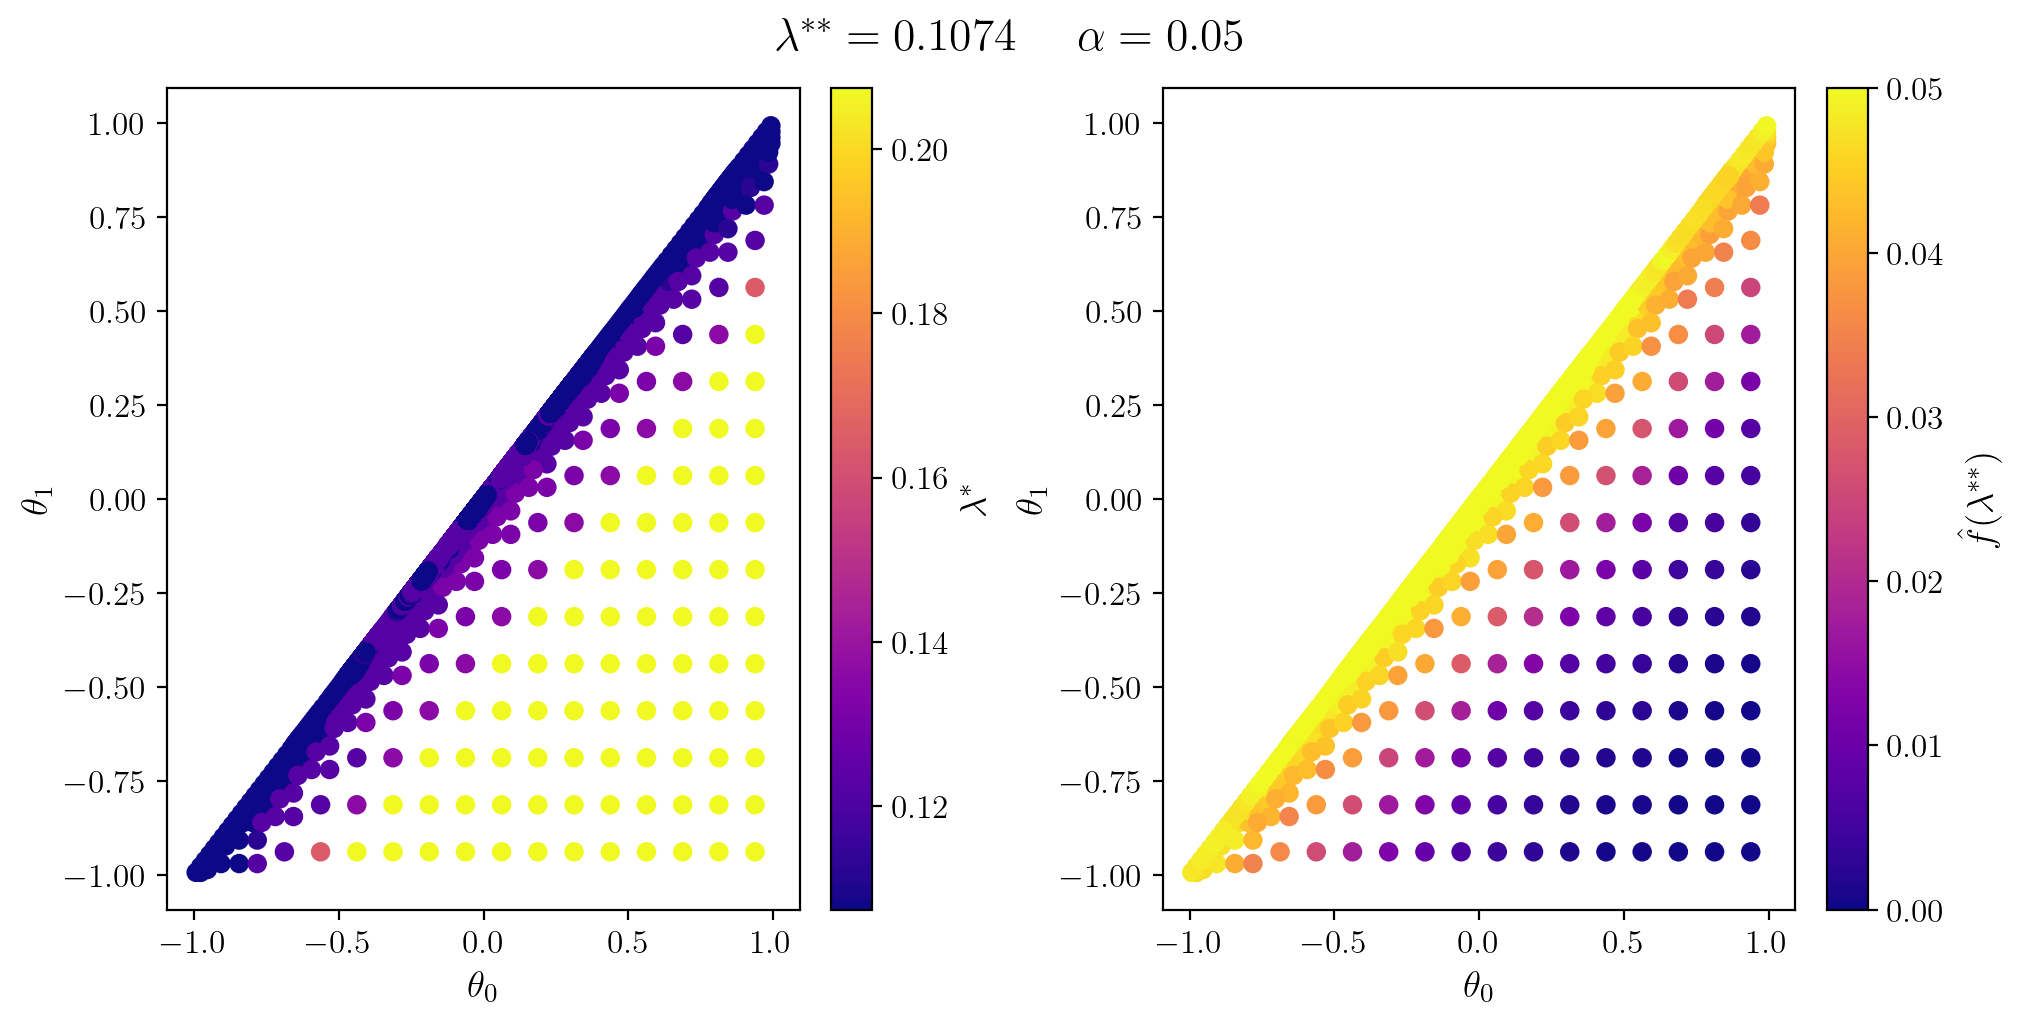

In [5]:
plt.figure(figsize=(10, 5), constrained_layout=True)
plt.subplot(1, 2, 1)
plt.suptitle("$\lambda^{**} = " + f"{lamss:.4f} ~~~~ \\alpha = {alpha}$")
plt.scatter(df["theta0"], df["theta1"], c=df["lams"], vmin=lamss, vmax=lamss + 0.1)
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$")
plt.colorbar(label="$\lambda^*$")

plt.subplot(1, 2, 2)
plt.scatter(df["theta0"], df["theta1"], c=rej_df["tie_bound"], vmin=0, vmax=alpha)
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$")
plt.colorbar(label="$\hat{f}(\lambda^{**})$")
plt.show()

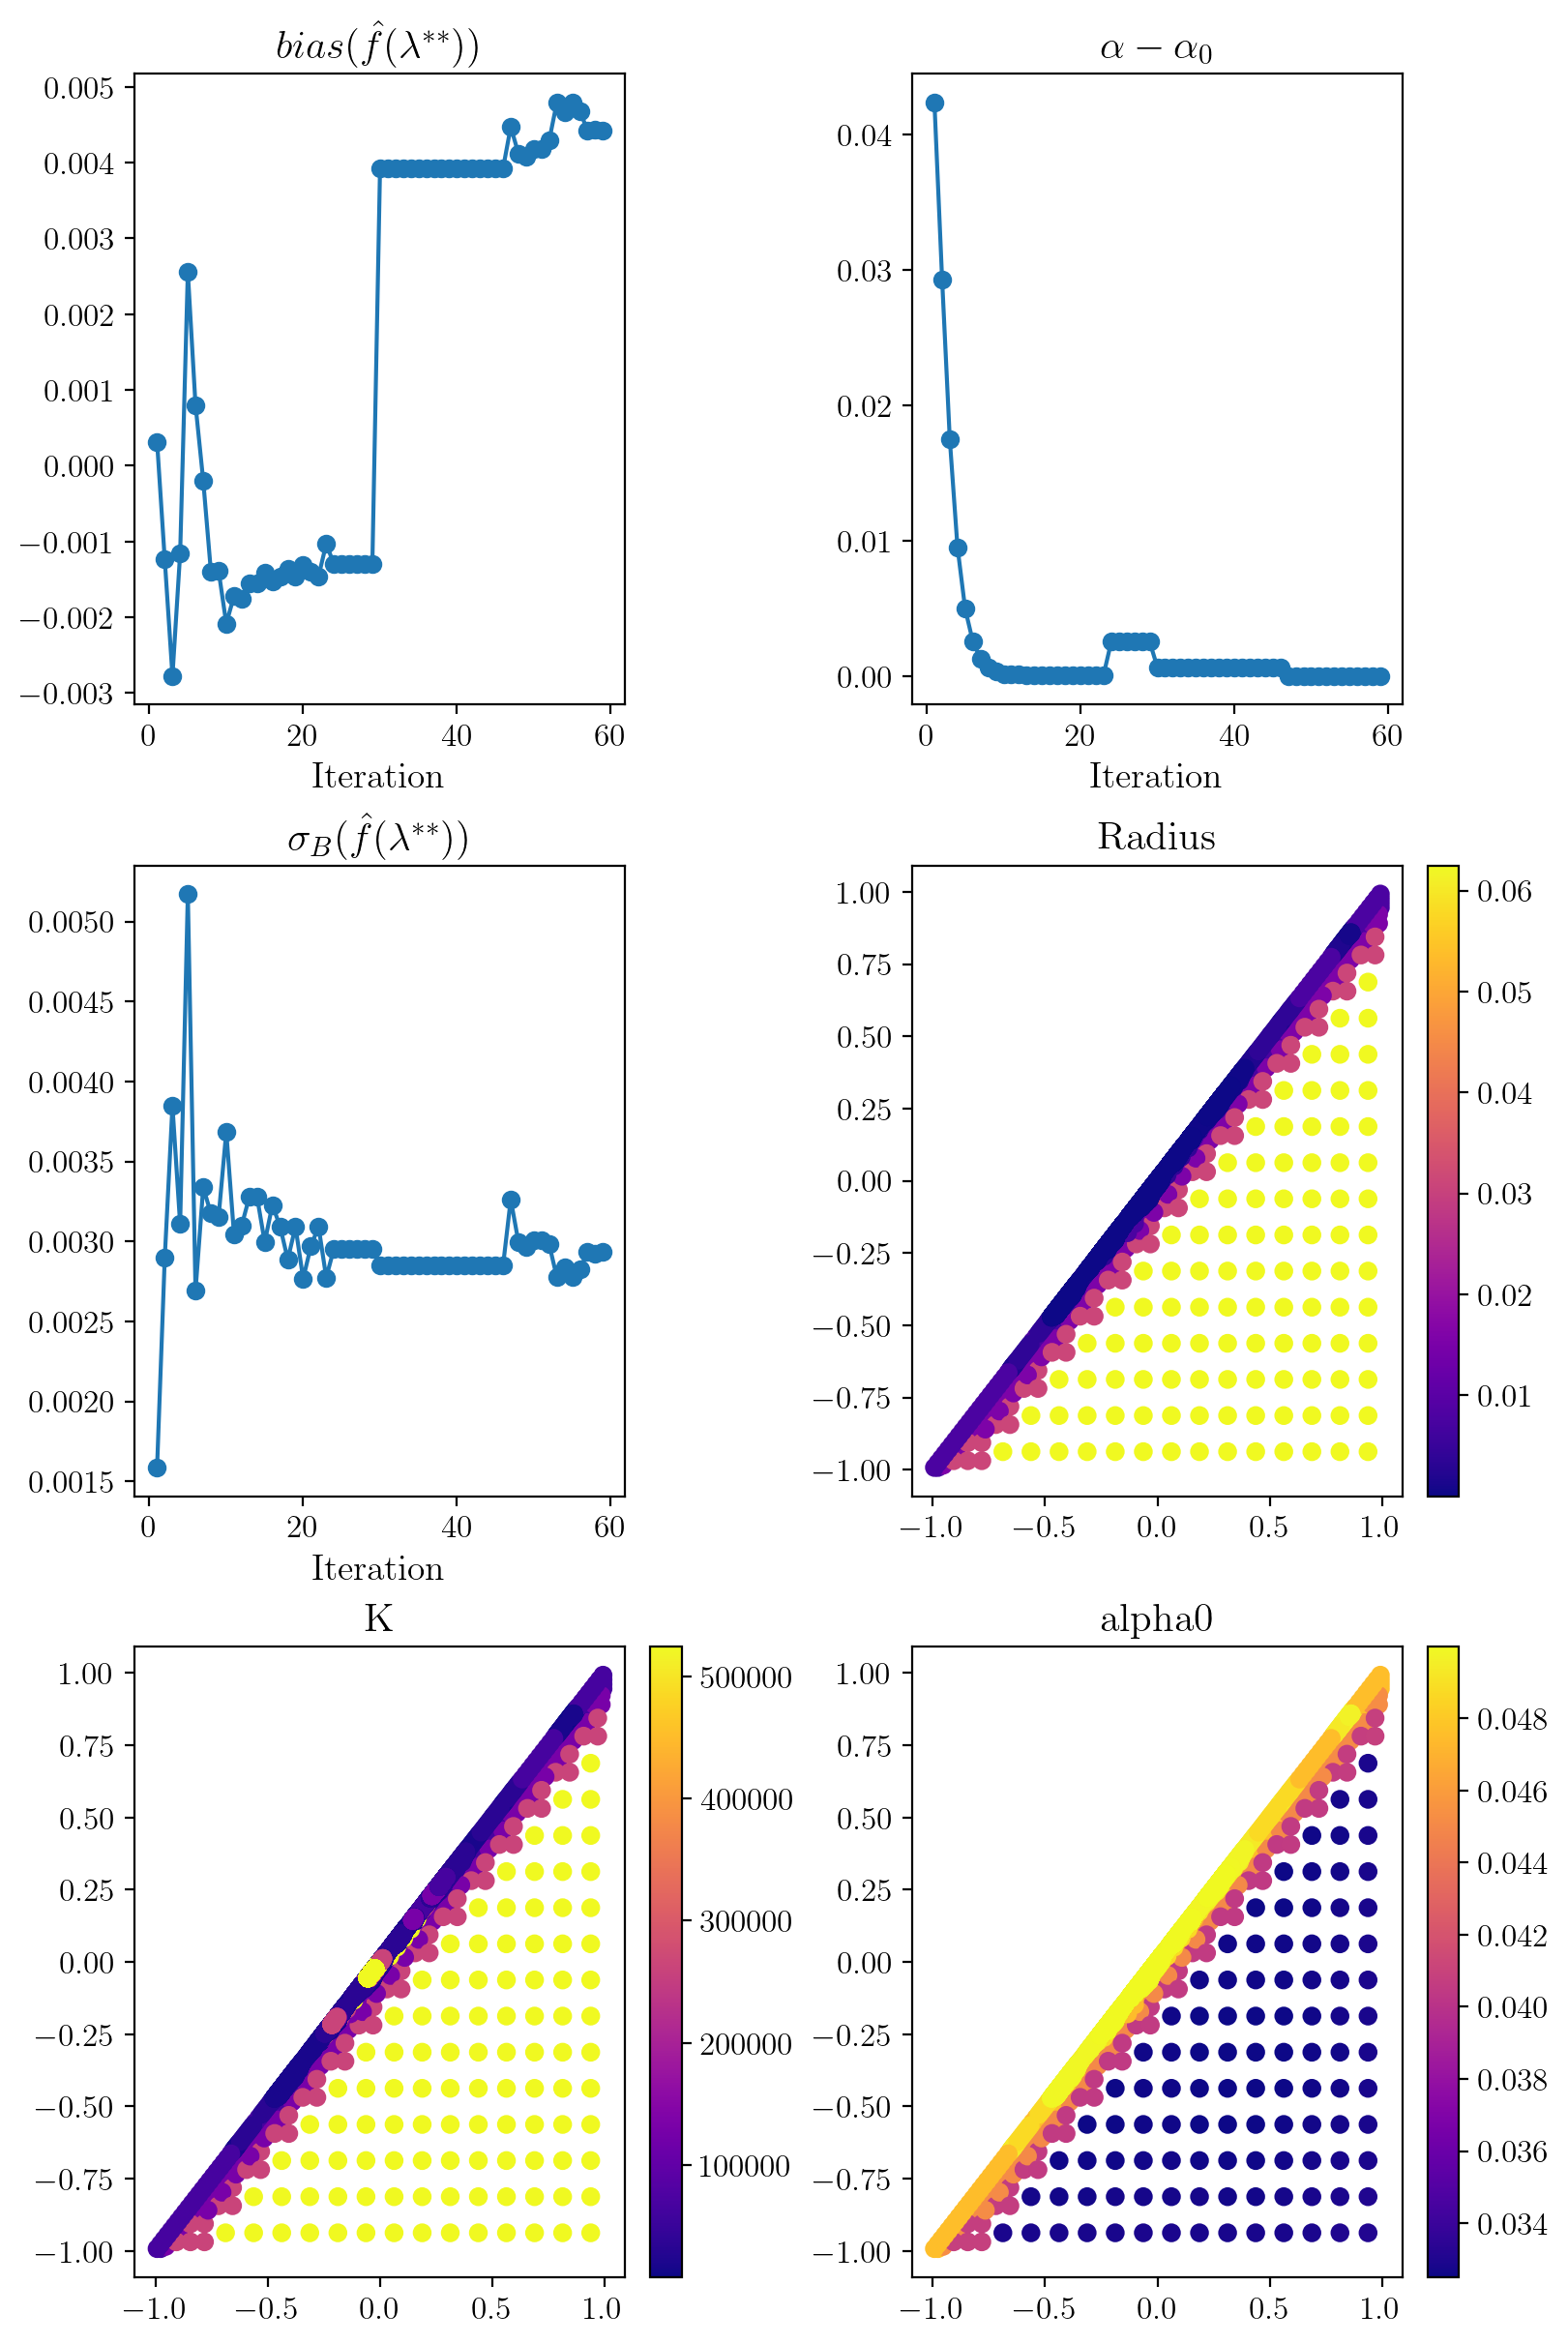

In [7]:
import pandas as pd

evolution = pd.DataFrame(reports)
fig, ax = plt.subplots(3, 2, figsize=(8, 12), constrained_layout=True)
plt.subplot(3, 2, 1)
plt.plot(evolution["i"], evolution["bias_tie"], "o-")
plt.xlabel("Iteration")
plt.title(r"$bias(\hat{f}(\lambda^{**}))$")
plt.subplot(3, 2, 2)
plt.plot(evolution["i"], evolution["grid_cost"], "o-")
plt.xlabel("Iteration")
plt.title(r"$\alpha - \alpha_0$")
plt.subplot(3, 2, 3)
plt.plot(evolution["i"], evolution["std_tie"], "o-")
plt.xlabel("Iteration")
plt.title(r"$\sigma_{B}(\hat{f}(\lambda^{**}))$")
plt.subplot(3, 2, 4)
plt.scatter(df["theta0"], df["theta1"], c=df["radii0"])
plt.colorbar()
plt.title("Radius")
plt.subplot(3, 2, 5)
plt.scatter(df["theta0"], df["theta1"], c=df["K"])
plt.colorbar()
plt.title("K")
plt.subplot(3, 2, 6)
plt.scatter(df["theta0"], df["theta1"], c=df["alpha0"])
plt.colorbar()
plt.title("alpha0")
plt.show()

In [8]:
lamss

0.10737964351157812

In [10]:
def compare_tables(n, lam, lamss):
    successes = np.stack(
        np.meshgrid(np.arange(n + 1), np.arange(n + 1)), axis=-1
    ).reshape(-1, 2)
    possible_datasets = np.concatenate(
        (successes[:, None, :], n - successes[:, None, :]),
        axis=1,
    )

    boschloo = np.array(
        [
            scipy.stats.boschloo_exact(possible_datasets[i], alternative="less").pvalue
            for i in range(possible_datasets.shape[0])
        ]
    )
    barnard = np.array(
        [
            scipy.stats.barnard_exact(possible_datasets[i], alternative="less").pvalue
            for i in range(possible_datasets.shape[0])
        ]
    )
    tuned_fisher = np.array(
        [
            scipy.stats.fisher_exact(possible_datasets[i], alternative="less")[1]
            for i in range(possible_datasets.shape[0])
        ]
    )
    differences = np.where(
        ((boschloo < lam) != (tuned_fisher < lamss - 1e-12))
        | ((barnard < lam) != (tuned_fisher < lamss - 1e-12))
    )[0]
    return (
        possible_datasets[differences],
        boschloo[differences],
        boschloo[differences] < lam,
        barnard[differences],
        barnard[differences] < lam,
        tuned_fisher[differences],
        tuned_fisher[differences] < lamss - 1e-12,
    )


compare_tables(n, alpha, lamss)

(array([[[ 0,  3],
         [15, 12]],
 
        [[ 1,  5],
         [14, 10]]]),
 array([0.05933533, 0.04945502]),
 array([False,  True]),
 array([0.04941523, 0.05009282]),
 array([ True, False]),
 array([0.11206897, 0.08429119]),
 array([False,  True]))

In [ ]:
g_check = ip.cartesian_grid(
    [-1, -1], [1, 1], n=[1, 1], null_hypos=[ip.hypo("theta1 < theta0")]
)
K = 256
fisher_df = ip.validate(fisher.FisherExact, g_check, lam, K=K, model_kwargs=dict(n=n))
boschloo_df = ip.validate(
    fisher.BoschlooExact, g_check, lam, K=K, model_kwargs=dict(n=n)
)
barnard_df = ip.validate(fisher.BarnardExact, g_check, lam, K=K, model_kwargs=dict(n=n))
tuned_fisher_df = ip.validate(
    fisher.FisherExact, g_check, lamss, K=K, model_kwargs=dict(n=n)
)
print(f"n=8, fisher(0.05)={fisher_df['tie_est'].max()}")
print(f"n=8, boschloo(0.05)={boschloo_df['tie_est'].max()}")
print(f"n=8, barnard(0.05)={barnard_df['tie_est'].max()}")
print(f"n=8, tuned_fisher({lamss:5f})={tuned_fisher_df['tie_est'].max()}")
print(
    "max difference boschloo vs tuned fisher: ",
    np.abs(barnard_df["tie_est"] - boschloo_df["tie_est"]).max(),
)
print(
    "max difference barnard vs tuned fisher: ",
    np.abs(barnard_df["tie_est"] - boschloo_df["tie_est"]).max(),
)

NameError: name 'lam' is not defined